# Anggota
1. **Putri Rizki Amalia - 17751**
2. **Abdul Hamid Umar - 17843**
3. **Gregorius Aria Neruda - 17958**

Data diambil dari http://data.insideairbnb.com/united-states/ma/boston/2019-12-04/visualisations/listings.csv

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5506,**$79 Special ** Private! Minutes to center!,8229,Terry,NaN,Roxbury,42.32981,-71.09559,Entire home/apt,145,3,106,2019-10-31,0.81,6,27
1,6695,$99 Special!! Home Away! Condo,8229,Terry,NaN,Roxbury,42.32994,-71.09351,Entire home/apt,169,3,115,2019-11-02,0.91,6,18
2,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Downtown,42.35919,-71.06265,Entire home/apt,99,32,24,2019-09-30,0.37,10,186
3,10730,Bright 1bed facing Golden Dome,26988,Anne,NaN,Downtown,42.35840,-71.06185,Entire home/apt,150,91,30,2019-09-14,0.24,10,240
4,10811,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",38997,Michelle,NaN,Back Bay,42.34973,-71.08792,Entire home/apt,84,90,9,2019-07-22,0.19,7,336


Setelah melihat preview dari datanya, selanjutnya kita lihat dimensi dari data

In [3]:
df.shape

(3507, 16)

Data memiliki 3507 baris dan 16 kolom

## Proses Cleaning

### Mencari data kosong

In [4]:
df.isnull().any()

id                                False
name                              False
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

Dari hasil output cell sebelumnya, dapat dilihat terdapat beberapa kolom yang memiliki data kosong, diantaranya:

1. `host_name`
2. `neighbourhood_group`  
3. `last_review`
4. `reviews_per_month` 

In [5]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                           15
neighbourhood_group               3507
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        684
reviews_per_month                  684
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Dapat dilihat cacah data yang kosong:

1. `host_name`: 15
2. `neighbourhood_group`: 3507  
3. `last_review`: 684 
4. `reviews_per_month`: 684 

### Menghapus neighbourhood_group 
Karena cacah data kosong pada `neighbourhood_group` sama dengan dimensi, kita hapus kolom `neighbourhood_group`

In [6]:
df = df.drop(['neighbourhood_group'], axis=1)

### Menghapus listing yang tidak memiliki review (baris last_review dan reviews_per_month kosong)

In [7]:
df = df.dropna(subset=['last_review', 'reviews_per_month'])

### Mengganti value `host_name` kosong (`NaN`) menjadi `Unknown`

In [8]:
df = df.fillna('Unknown')

### Mengganti nama kolom "price" menjadi "price_in_usd"

In [9]:
df = df.rename(columns={"price": "price_in_usd"})

## Data Hasil Cleaning

In [10]:
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_in_usd,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5506,**$79 Special ** Private! Minutes to center!,8229,Terry,Roxbury,42.32981,-71.09559,Entire home/apt,145,3,106,2019-10-31,0.81,6,27
1,6695,$99 Special!! Home Away! Condo,8229,Terry,Roxbury,42.32994,-71.09351,Entire home/apt,169,3,115,2019-11-02,0.91,6,18
2,8789,Curved Glass Studio/1bd facing Park,26988,Anne,Downtown,42.35919,-71.06265,Entire home/apt,99,32,24,2019-09-30,0.37,10,186
3,10730,Bright 1bed facing Golden Dome,26988,Anne,Downtown,42.35840,-71.06185,Entire home/apt,150,91,30,2019-09-14,0.24,10,240
4,10811,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",38997,Michelle,Back Bay,42.34973,-71.08792,Entire home/apt,84,90,9,2019-07-22,0.19,7,336
5,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",38997,Michelle,Back Bay,42.34961,-71.08904,Entire home/apt,179,33,78,2019-11-30,1.81,7,0
6,10986,Waterfront/North End Furnished Large Studio Apt,38997,Michelle,North End,42.36352,-71.05075,Entire home/apt,125,91,2,2016-05-23,0.05,7,364
7,18711,The Dorset | 3BR 1BA | 1st Floor,71783,Lance,Dorchester,42.32329,-71.06210,Entire home/apt,150,32,52,2019-10-05,0.45,22,0
8,22354,COPLEY SQ...19TH C.TWNHSE SUNNY RM,85770,Robert,South End,42.34496,-71.07486,Private room,148,2,315,2019-11-12,3.10,5,0
9,24240,"The Golden Slipper B&B Afloat, 2 bed/2 bath",97821,Gretchen,North End,42.36366,-71.05023,Entire home/apt,290,2,103,2019-10-03,0.93,1,198


# Exploratory Data Analysis

In [11]:
import seaborn as sns

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price_in_usd                        int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Melihat Korelasi

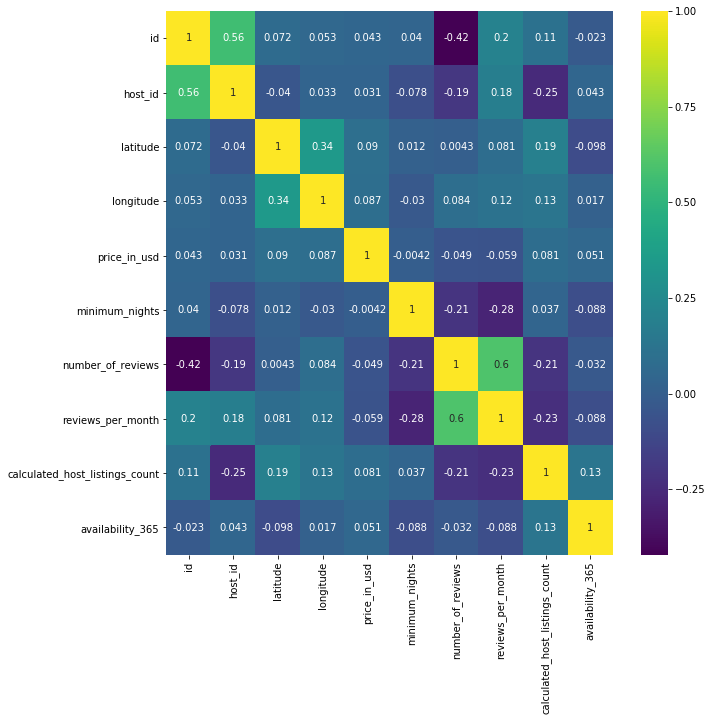

In [100]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

## Continuous Numerical Variable

Melihat atribut yang bersifat numerik dan membuat plot histogram dari masing-masing atribut:

In [35]:
num_attributes = df.select_dtypes(include=['int64'])
num_attributes.columns

Index(['id', 'host_id', 'price_in_usd', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2F1424F28>,
      dtype=object)

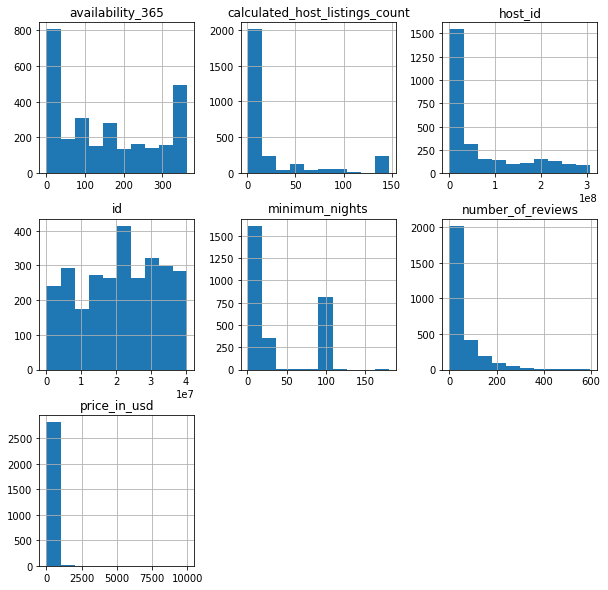

In [39]:
num_attributes.hist(figsize=(10,10))

In [36]:
num_attributes.describe()

,id,host_id,price_in_usd,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,2.823000e+03,2.823000e+03,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,2.110304e+07,7.199910e+07,174.315976,32.513284,52.479986,24.699256,153.985831
std,1.139398e+07,8.618131e+07,303.603834,40.143114,73.139326,42.038260,130.788460
min,5.506000e+03,7.969000e+03,10.000000,1.000000,0.000000,1.000000,0.000000
25%,1.209041e+07,1.087773e+07,80.000000,2.000000,6.000000,1.000000,21.000000
50%,2.200960e+07,2.736407e+07,140.000000,3.000000,23.000000,5.000000,129.000000
75%,3.039640e+07,1.131583e+08,200.000000,91.000000,71.000000,20.000000,274.000000
max,4.051239e+07,3.084571e+08,10000.000000,180.000000,599.000000,147.000000,365.000000


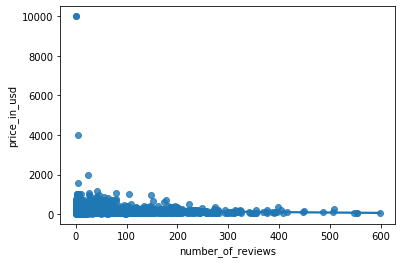

In [14]:
# hubungan cacah review dengan harga listing
sns.regplot(x='number_of_reviews', y='price_in_usd', data=df)

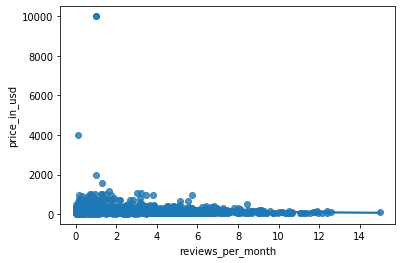

In [15]:
# hubungan review per bulan dengan harga listing
sns.regplot(x='reviews_per_month', y='price_in_usd', data=df)

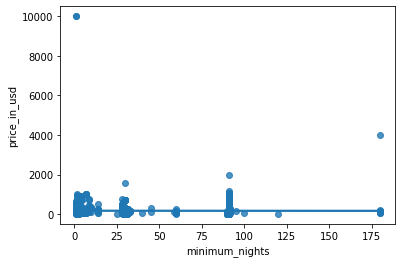

In [16]:
# hubungan minimum nights dengan harga listing
sns.regplot(x='minimum_nights', y='price_in_usd', data=df)

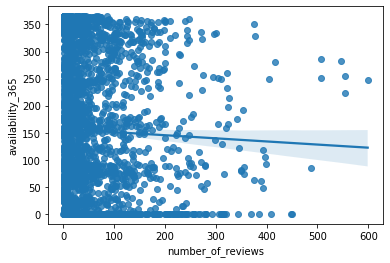

In [17]:
# hubungan cacah review dengan ketersediaan dalam satu tahun
sns.regplot(x='number_of_reviews', y='availability_365', data=df)

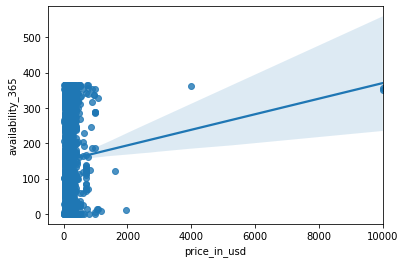

In [18]:
# hubungan harga listing dengan ketersediaan dalam satu tahun
sns.regplot(x='price_in_usd', y='availability_365', data=df)

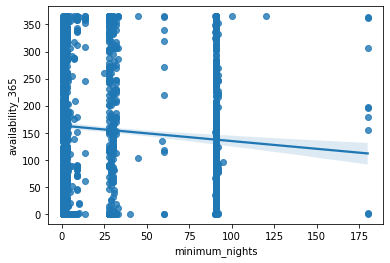

In [19]:
# hubungan minimum nights dengan ketersediaan dalam satu tahun
sns.regplot(x='minimum_nights', y='availability_365', data=df)

## Categorical Variable

Melihat atribut yang bersifat kategorik:

In [39]:
cat_attributes = df.select_dtypes(include=['object'])
cat_attributes.columns

Index(['name', 'host_name', 'neighbourhood', 'room_type', 'last_review'], dtype='object')

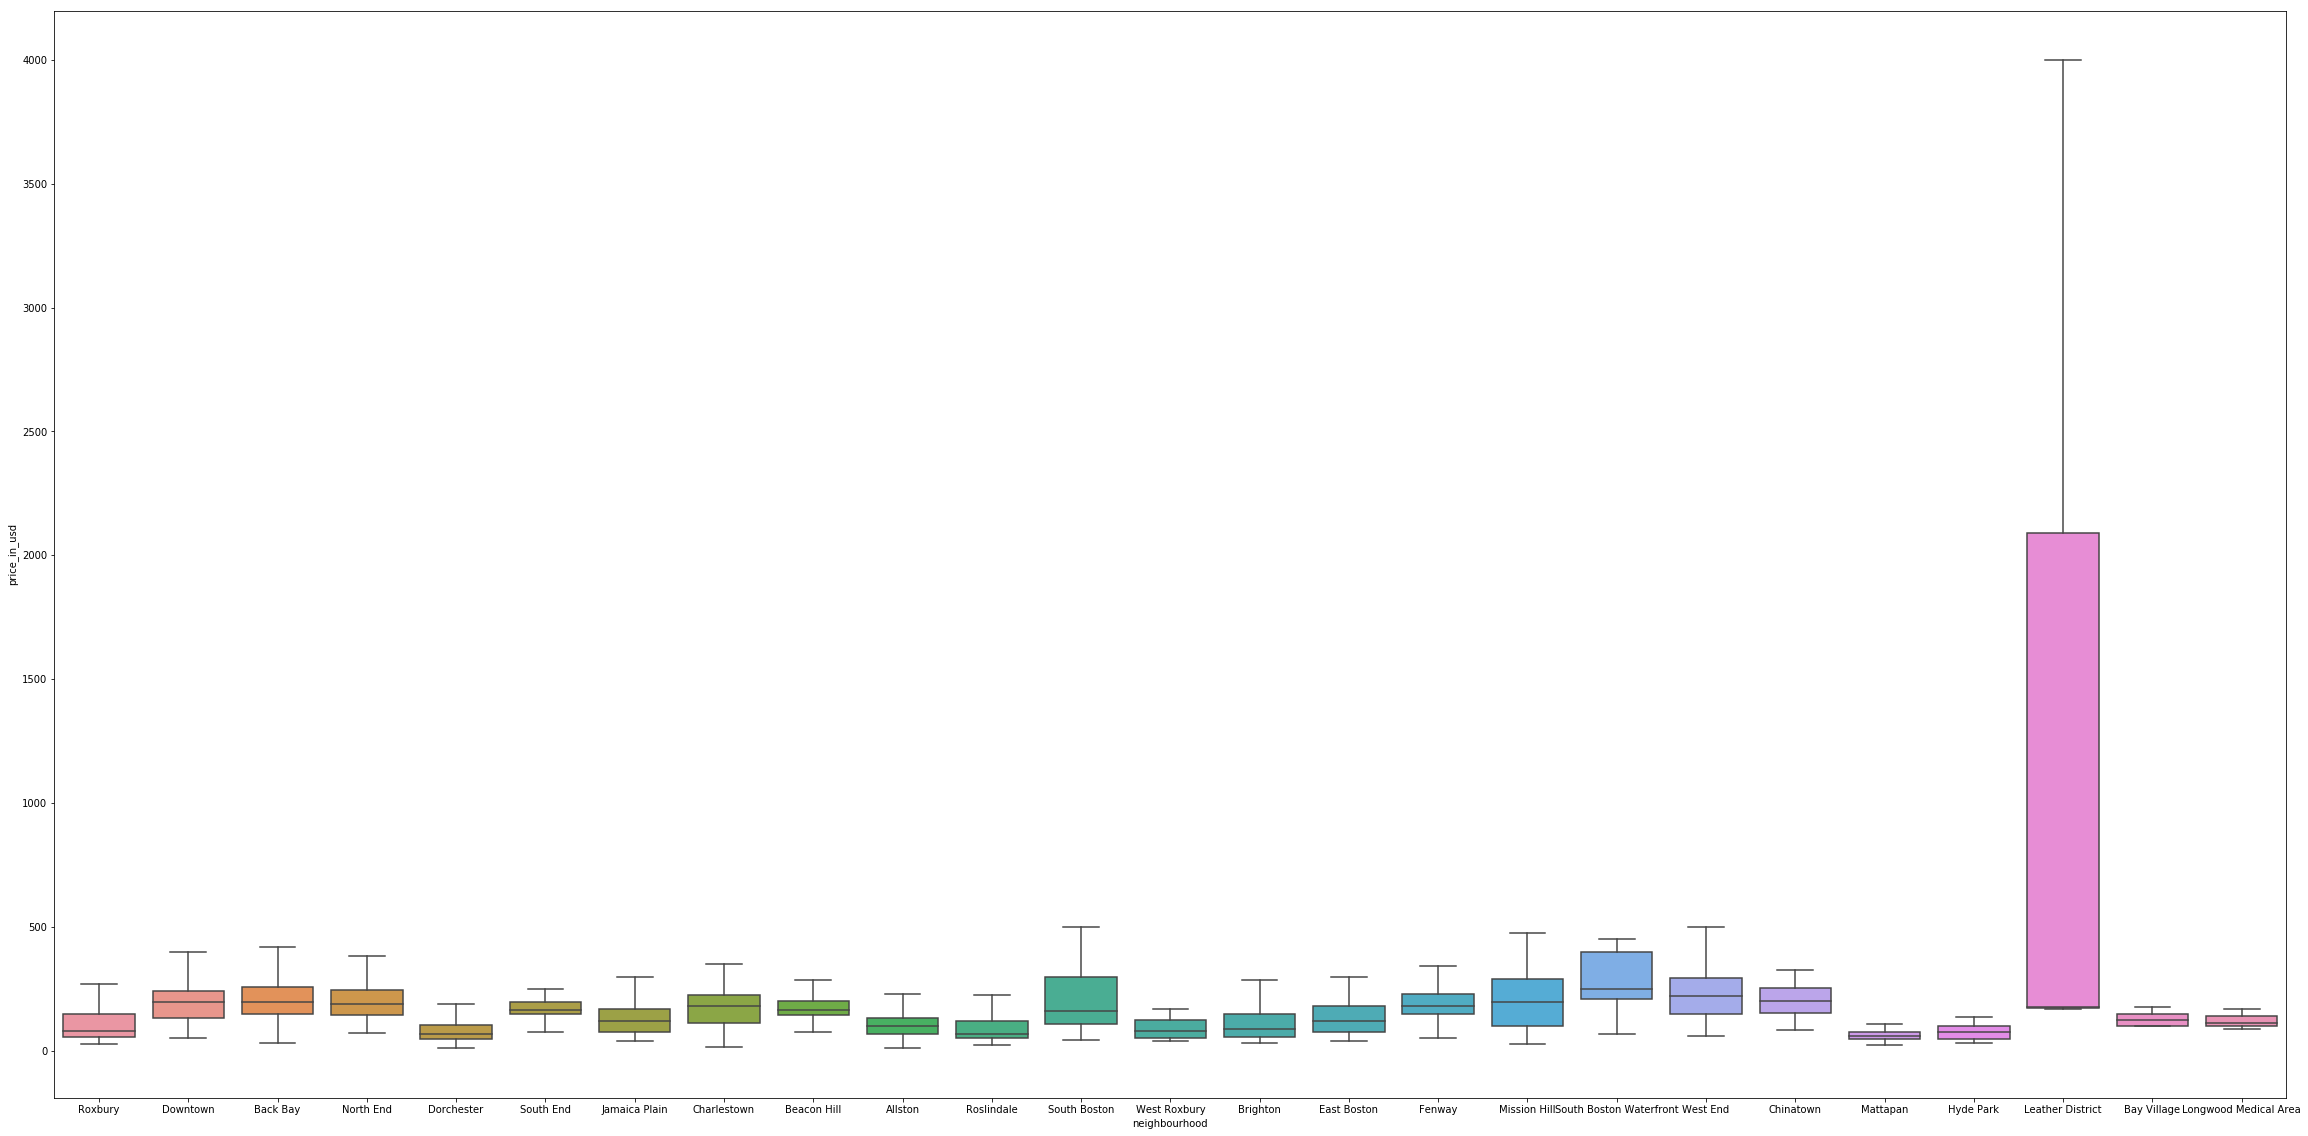

In [23]:
# plot neighbourhood dengan harga
plt.figure(figsize=(40,20))
sns.boxplot(x='neighbourhood', y='price_in_usd', data=df, showfliers=False)

Boxplot hubungan antara `neighbourhood` dengan `price_in_usd`.

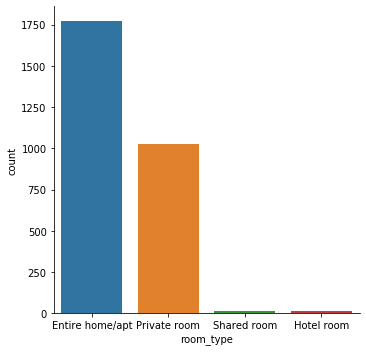

In [44]:
sns.catplot(x='room_type', kind='count', data=cat_attributes)

Categorical count plot untuk `room_type`

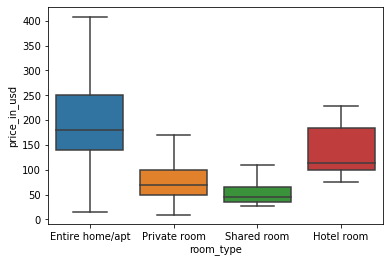

In [22]:
sns.boxplot(x='room_type', y='price_in_usd', data=df, showfliers=False)

Boxplot hubungan `room_type` dengan `price_in_usd`. Ruangan tipe `Entire home/apt` memiliki rata-rata harga paling tinggi dibandingkan tipe ruangan lain, dan ruangan tipe `Shared room` memiliki rata-rata harga paling rendah.

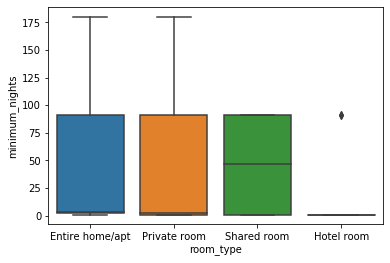

In [23]:
sns.boxplot(x='room_type', y='minimum_nights', data=df)

Boxplot hubungan `room_type` dengan `minimum_nights`.

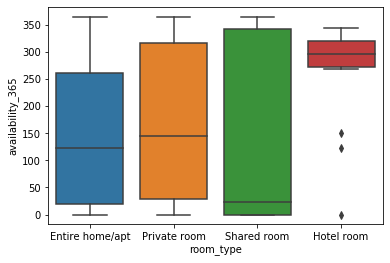

In [24]:
sns.boxplot(x='room_type', y='availability_365', data=df)

Boxplot hubungan antara tipe kamar dengan ketersediaannya dalam satu tahun, dapat dilihat bahwa tipe kamar `Shared room` memiliki rata-rata ketersediaan paling rendah, dan tipe kamar `Hotel room` memiliki rata-rata ketersediaan yang paling tinggi.

## Statistical Descriptive

In [101]:
df['host_name'].value_counts()

Sonder                             147
Corp Condos & Apts                  90
Short Term Rentals Boston           75
Kara                                58
Maverick                            54
Cindy                               49
Mike                                48
Temple Place                        41
Huggy                               31
Marie                               31
Bay Village                         23
Jason                               23
Jonathan                            22
Michelle                            22
Bluebird                            21
Airbnb                              20
David                               19
Ken                                 18
Lance                               18
Bridget, Steven And Nils            18
John                                17
Ann                                 17
Eder                                17
Alex @ Boston Corporate Housing     17
Adam                                16
Bv                       

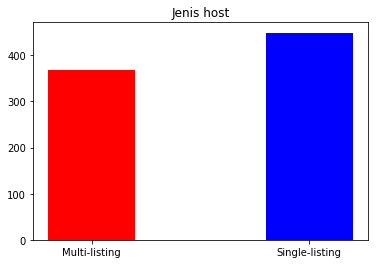

In [51]:
multi = 0
single = 0
total = 0
for listings in df['host_name'].value_counts():
    if listings > 1:
        multi+=1
    else:
        single +=1
    total+=1

labels = ["Multi-listing", "Single-listing"]
data = [multi, single]
plt.bar(labels, data, tick_label = labels, 
        width =0.4,color=['red', 'blue']) 
# plot title 
plt.title('Jenis host') 
  
# function to show the plot 
plt.show() 


Dari grafik tersebut dapat kita lihat bahwa lebih banyak jumlah host yang hanya memiliki satu listing jika dibandingkan dengan host dengan listing yang banyak. Host dengan listing yang lebih banyak juga lebih memungkinkan untuk menjalankan sebuah bisnis.

In [25]:
df['neighbourhood'].value_counts()

Dorchester                 330
Downtown                   244
Jamaica Plain              222
South End                  214
Back Bay                   188
Roxbury                    181
Allston                    171
Fenway                     165
East Boston                159
South Boston               142
Brighton                   126
Beacon Hill                101
Mission Hill                84
North End                   75
Charlestown                 66
Roslindale                  65
West End                    52
West Roxbury                45
Bay Village                 42
South Boston Waterfront     41
Mattapan                    36
Chinatown                   35
Hyde Park                   33
Leather District             3
Longwood Medical Area        3
Name: neighbourhood, dtype: int64

In [26]:
# A general function for horizontal bar plots in descending order
# Size = 12x6
def descendingBarh(column: str):
    x = df[column].value_counts().sort_values().tolist()
    y = df[column].value_counts().sort_values().keys().tolist()
    color = []
    for i in range(len(y)):
        total = sum(x)
        percentage = (x[i] / total) * 100
        y[i] = y[i] + f" {percentage:.1f}%"
        color.append(np.random.rand(3,))

    plt.figure(figsize=(12,6))
    plt.barh(y, x, height=0.7, color=color)
    plt.show()

Dengan adanya fungsi umum tersebut, kita dapat memanggilnya berkali-kali untuk memvisualisasi *plot* tentang statistik suatu kolom. 

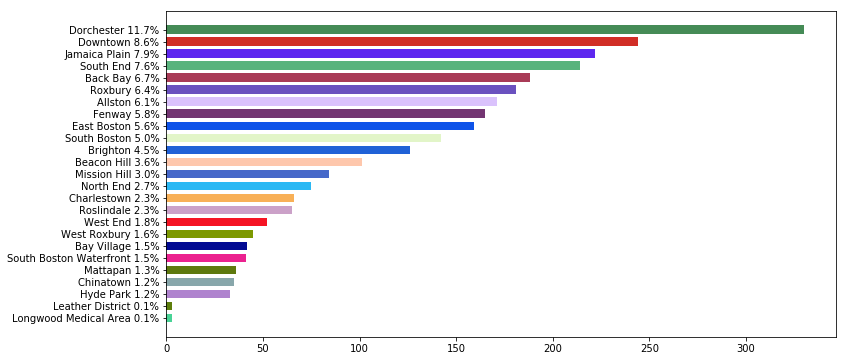

In [27]:
descendingBarh('neighbourhood')

Menggunakan fungsi `descendingBarh()` untuk memvisualisasi kolom `neighbourhood`. 


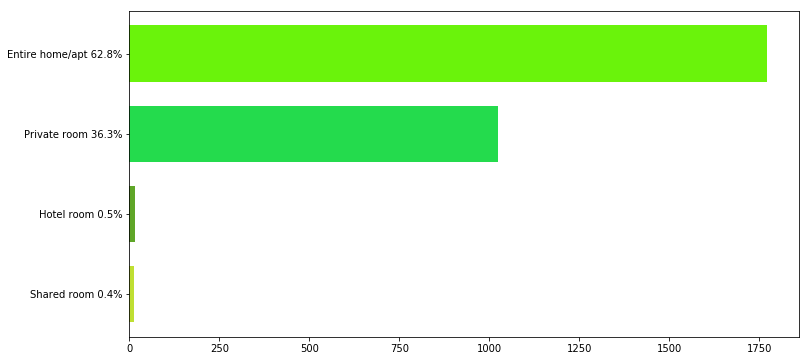

In [28]:
descendingBarh('room_type')

Menggunakan fungsi `descendingBarh()` untuk memvisualisasi kolom `room_type`.